In [1]:
import pandas as pd

# Load the data
df = pd.read_feather('../../data/df_notsplit.feather')

In [2]:
df.head()

,index,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,...,segmentsCabinCode,travelDurationInSeconds,totalDurationInSeconds,travelLayover,SumsegmentsDurationInSeconds,Departure,Arrival,transitAirportCode,SumsegmentsDistance,AllAirport
0,0,e1b137527b9175d7d930c3af82e70ae0,2022-04-19,2022-05-20,OAK,ATL,PT7H52M,False,False,False,...,"[coach, coach]",28320.0,19800,8520.0,19800,[OAK],[ATL],[DEN],2150.0,"[DEN, OAK, ATL]"
1,1,d813ebd107e3fa700206c0d96015da7a,2022-04-19,2022-05-20,OAK,ATL,PT6H15M,False,False,False,...,"[coach, coach]",22500.0,20520,1980.0,20520,[OAK],[ATL],[LAX],NaN,"[LAX, OAK, ATL]"
2,2,e8ece5ad6f5962c696e06e031fc2a24a,2022-04-19,2022-05-20,OAK,ATL,PT9H6M,False,False,False,...,"[coach, coach]",32760.0,20520,12240.0,20520,[OAK],[ATL],[LAX],NaN,"[LAX, OAK, ATL]"
3,3,c004a54681335100f326c9613b3c9448,2022-04-19,2022-05-20,OAK,ATL,PT6H17M,False,False,False,...,"[coach, coach]",22620.0,19560,3060.0,19560,[OAK],[ATL],[LAS],NaN,"[LAS, OAK, ATL]"
4,4,4a42bbf77211b4afa7b9e14005949120,2022-04-19,2022-05-20,OAK,ATL,PT14H12M,False,False,False,...,"[coach, coach]",51120.0,25080,26040.0,25080,[OAK],[ATL],[SEA],2850.0,"[SEA, OAK, ATL]"


In [3]:
df.columns

Index(['index', 'legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode', 'travelDurationInSeconds',
       'totalDurationInSeconds', 'travelLayover',
       'SumsegmentsDurationInSeconds', 'Departure', 'Arrival',
       'transitAirportCode', 'SumsegmentsDistance', 'AllAirport'],
      dtype='object')

In [4]:
df = df.drop(['index'], axis=1)

In [5]:
df = df.sample(frac=0.05, random_state=42)

In [6]:
df.shape

(676000, 32)

In [7]:
df['searchDate'] = pd.to_datetime(df['searchDate'])
df['flightDate'] = pd.to_datetime(df['flightDate'])

In [8]:
df['startingAirport'].value_counts()

LAX    67119
LGA    51152
BOS    49600
SFO    47613
DFW    44911
ORD    44569
ATL    43926
MIA    43766
CLT    42521
PHL    39091
DEN    38209
DTW    37659
EWR    35197
JFK    34315
IAD    29916
OAK    26436
Name: startingAirport, dtype: int64

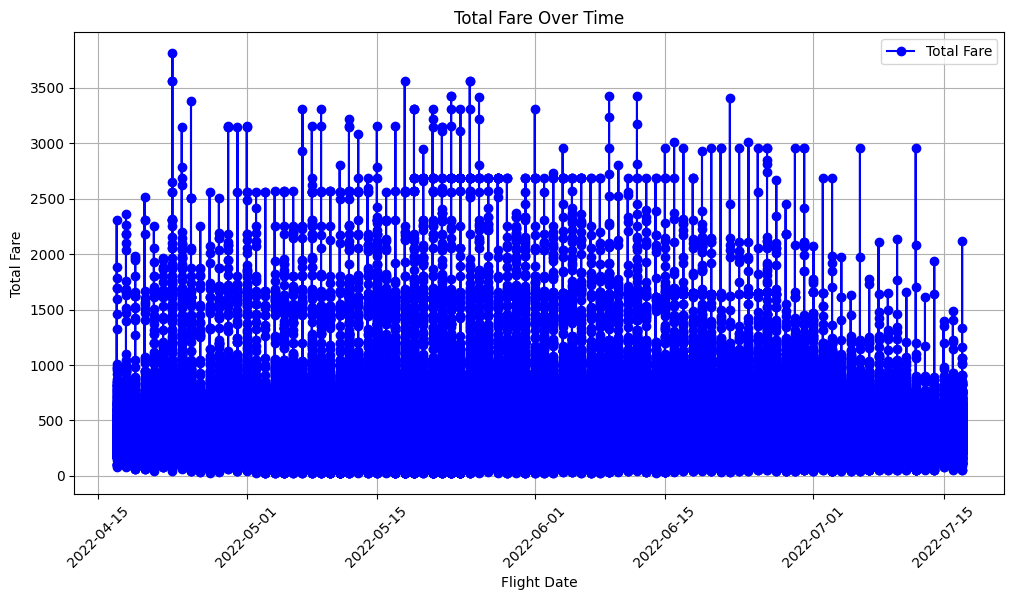

In [10]:
import matplotlib.pyplot as plt
# Sort the DataFrame by 'flightdate' to ensure it's in chronological order
df.sort_values('flightDate', inplace=True)

# Create a line plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(df['flightDate'], df['totalFare'], label='Total Fare', color='b', marker='o')
plt.title('Total Fare Over Time')
plt.xlabel('Flight Date')
plt.ylabel('Total Fare')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [11]:
top_10_fares = df.nlargest(10, 'totalFare')

In [12]:
top_10_fares

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsCabinCode,travelDurationInSeconds,totalDurationInSeconds,travelLayover,SumsegmentsDurationInSeconds,Departure,Arrival,transitAirportCode,SumsegmentsDistance,AllAirport
3053836,afbb806b2657ae577266a926030b71f3,2022-04-18,2022-04-23,LAX,JFK,PT5H30M,False,False,True,3810.60,...,[first],19800.0,19800,0.0,19800,[LAX],[JFK],[LAX],2458.0,"[LAX, LAX, JFK]"
3149613,c9db048330cfb746b91c2db49bf8d2af,2022-04-17,2022-04-23,LAX,JFK,PT5H31M,False,False,True,3564.61,...,[first],19860.0,19860,0.0,19860,[LAX],[JFK],[LAX],2458.0,"[LAX, LAX, JFK]"
3227088,afbb806b2657ae577266a926030b71f3,2022-04-16,2022-04-23,LAX,JFK,PT5H30M,False,False,True,3564.61,...,[first],19800.0,19800,0.0,19800,[LAX],[JFK],[LAX],2458.0,"[LAX, LAX, JFK]"
3239163,e347944efa9cff35cef4cb2142a1fb01,2022-04-30,2022-05-18,LAX,BOS,PT5H29M,False,False,True,3564.61,...,[business],19740.0,19740,0.0,19740,[LAX],[BOS],[LAX],2606.0,"[LAX, LAX, BOS]"
2902889,28ae1d27ae4fb7743e2d21c769eac263,2022-05-09,2022-05-25,LAX,BOS,PT5H29M,False,False,True,3564.61,...,[business],19740.0,19740,0.0,19740,[LAX],[BOS],[LAX],2606.0,"[LAX, LAX, BOS]"
3102241,fb70d8d55e982b8e5af289336300a4f8,2022-05-08,2022-05-25,LAX,BOS,PT5H31M,False,False,True,3564.61,...,[business],19860.0,19860,0.0,19860,[LAX],[BOS],[LAX],2606.0,"[LAX, LAX, BOS]"
10348493,4246bc59d74afb7cb819fa8b9d84cf39,2022-05-03,2022-05-23,EWR,SFO,PT6H7M,False,False,True,3424.60,...,[business],22020.0,22020,0.0,22020,[EWR],[SFO],[EWR],2566.0,"[EWR, EWR, SFO]"
10246727,4246bc59d74afb7cb819fa8b9d84cf39,2022-05-02,2022-05-23,EWR,SFO,PT6H7M,False,False,True,3424.60,...,[business],22020.0,22020,0.0,22020,[EWR],[SFO],[EWR],2566.0,"[EWR, EWR, SFO]"
10782181,99aea7a059d9736cae8165423073c20f,2022-05-09,2022-06-09,EWR,SFO,PT6H2M,False,False,True,3424.60,...,[business],21720.0,21720,0.0,21720,[EWR],[SFO],[EWR],2566.0,"[EWR, EWR, SFO]"
11471249,6a48b82cc3602b5464974ab83aca072f,2022-05-04,2022-06-12,SFO,EWR,PT5H25M,False,False,True,3424.60,...,[business],19500.0,19500,0.0,19500,[SFO],[EWR],[SFO],2566.0,"[SFO, SFO, EWR]"


In [ ]:
df['AllAirport'].value_counts()

In [20]:
df['isNonStop'].value_counts()

False    478009
True     197991
Name: isNonStop, dtype: int64

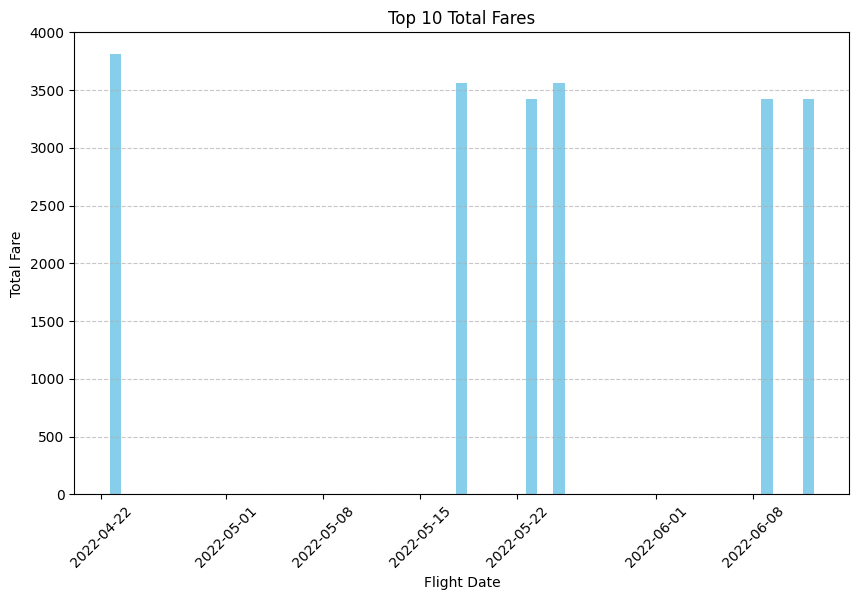

In [13]:
# Sort the DataFrame by 'totalFare' in descending order and select the top 10 rows
top_10_fares = df.nlargest(10, 'totalFare')

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(top_10_fares['flightDate'], top_10_fares['totalFare'], color='skyblue')
plt.title('Top 10 Total Fares')
plt.xlabel('Flight Date')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Group and count flights by airport
airport_counts = df['startingAirport'].value_counts()

# Sort the counts in descending order
top_10_airports = airport_counts.nlargest(10)

# Display the top 10 airports with the highest number of flights
print(top_10_airports)

LAX    67119
LGA    51152
BOS    49600
SFO    47613
DFW    44911
ORD    44569
ATL    43926
MIA    43766
CLT    42521
PHL    39091
Name: startingAirport, dtype: int64


In [15]:
# Group and count flights by airport
airport_counts = df['destinationAirport'].value_counts()

# Sort the counts in descending order
top_10_airports = airport_counts.nlargest(10)

# Display the top 10 airports with the highest number of flights
print(top_10_airports)

LAX    64809
LGA    51592
DFW    46447
MIA    46313
BOS    46306
ORD    45807
SFO    45797
ATL    45128
CLT    44504
DEN    39474
Name: destinationAirport, dtype: int64


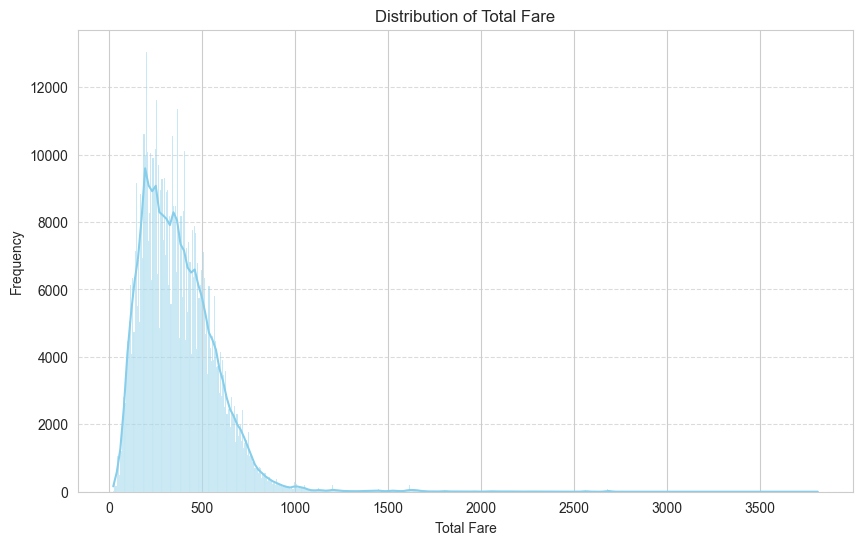

In [16]:
import seaborn as sns

# Set the style of the plot (optional)
sns.set_style("whitegrid")

# Create a histogram of the 'totalFare' values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data=df, x='totalFare', kde=True, color='skyblue')
plt.title('Distribution of Total Fare')
plt.xlabel('Total Fare')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The total fare is mostly depends on time ,source and destination cities ,class, type of airlines and stops